Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
(1000, 400, 400, 3)
(1000,)


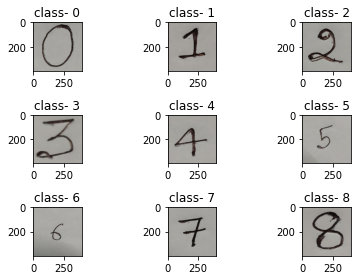

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=8192, out_features=4000, bias=True)
  (fc2): Linear(in_features=4000, out_features=2000, bias=True)
  (fc3): Linear(in_features=2000, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=500, bias=True)
  (fc5): Linear(in_features=500, out_features=120, bias=True)
  (fc6): Linear(in_features=120, out_features=84, bias=True)
  (fc7): Linear(in_features=84, out_features=10, bias=True)
)
[1,   100] loss: 0.466
[1,   200] loss: 4.585
[1,   300] loss: 1.948
[1,   400] loss: 2.362
[1,   500] loss: 2.298
[1,   600] loss: 2.199
[1,   700] loss: 2.194
[1,   

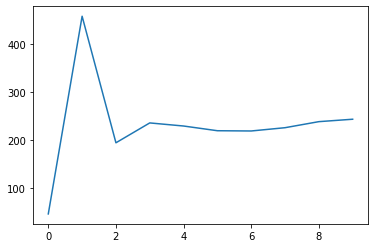

Finished Training
tensor([[-0.4462, -0.6658, -0.1875, -0.4671,  0.0008,  0.0694,  0.2353,  0.3952,
          0.5390,  0.5467]], grad_fn=<AddmmBackward>)
GroundTruth:  b'1'
Predicted:  tensor([9])
Accuracy of the network on the 1000 test images: 10 %
Accuracy of     0 :  0 %
Accuracy of     1 :  0 %
Accuracy of     2 :  0 %
Accuracy of     3 :  0 %
Accuracy of     4 :  0 %
Accuracy of     5 :  0 %
Accuracy of     6 :  0 %
Accuracy of     7 :  0 %
Accuracy of     8 :  0 %
Accuracy of     9 : 100 %


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

# from google.colab import files
# files.upload()

from google.colab import drive
drive.mount('/content/drive')
# with open('/content/drive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')

train_set_img = []
train_set_label = []

def load_dataset():
    global train_set_img, train_set_label
    train_dataset = h5py.File('/content/drive/My Drive/test_data.h5', 'r')
    train_set_img = np.array(train_dataset["dataset_image"][:]) # train set features
    train_set_label = np.array(train_dataset["dataset_label"][:]) # train set labels
    print(train_set_img.shape)
    print(train_set_label.shape)
    # train_set_img = np.tile(train_set_img, (5,1,1,1))
    # train_set_label = np.tile(train_set_label, (5))
    # print(train_set_img.shape)
    # print(train_set_label.shape)

    ## plot img
    rows = 3
    cols = 3
    axes=[]
    fig=plt.figure()

    i =0
    for a in range(rows*cols):
        b = train_set_img[i]
        axes.append( fig.add_subplot(rows, cols, a+1) )

        subplot_title=('class- '+str(train_set_label[i], 'utf-8'))
        axes[-1].set_title(subplot_title)
         
        i+=100
        plt.imshow(b)
    fig.tight_layout()    
    plt.show()

load_dataset()
# print(train_set_label)

# Define a CNN

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.conv4 = nn.Conv2d(32, 64, 5)
        self.conv5 = nn.Conv2d(64, 128, 5)
        # self.fc1 = nn.Linear(128 * 8 * 8, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)
        self.fc1 = nn.Linear(128 * 8 * 8, 4000)
        self.fc2 = nn.Linear(4000, 2000)
        self.fc3 = nn.Linear(2000, 1000)
        self.fc4 = nn.Linear(1000, 500)
        self.fc5 = nn.Linear(500, 120)
        self.fc6 = nn.Linear(120, 84)
        self.fc7 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        #print(x.size())
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return x

net = Net()
print(net)


### Define a Loss function and optimizer ###

import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9) #, momentum=0.9


### Train the network ###

loss_values=[]
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(len(train_set_label)):
        # get the inputs
        inputs = train_set_img[i]
        inputs = np.moveaxis(inputs, -1, 0)
        inputs = torch.from_numpy(inputs)
        inputs = inputs.unsqueeze(0)
        #print(inputs.size())
        labels = train_set_label[i]
        labels = np.array([labels])
        labels = labels.astype(np.int)
        labels = torch.as_tensor(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.float())
        #print(outputs)
        # _, predicted = torch.max(outputs, 1)
        # print(predicted)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            loss_values.append(running_loss)
            running_loss = 0.0
plt.plot(loss_values)
plt.show()        
       
print('Finished Training')

# save trained model:
PATH = '/content/drive/My Drive/characterRecog.pth'
#torch.save(net.state_dict(), PATH)

# load back the saved model
# net = Net()
# net.load_state_dict(torch.load(PATH))

## test
test_image = train_set_img[100]
test_image = np.moveaxis(test_image, -1, 0)
test_image = torch.from_numpy(test_image)
test_image = test_image.unsqueeze(0)

outputs = net(test_image.float())
print(outputs)
_, predicted = torch.max(outputs, 1)

print('GroundTruth: ',train_set_label[100])
print('Predicted: ', predicted)


# network performs on the whole dataset
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(train_set_label)):
        images = train_set_img[i]
        images = np.moveaxis(images, -1, 0)
        images = torch.from_numpy(images)
        images = images.unsqueeze(0)

        labels = train_set_label[i]
        labels = np.array([labels])
        labels = labels.astype(np.int)
        labels = torch.as_tensor(labels)

        outputs = net(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 1000 test images: %d %%' % (
    100 * correct / total))


# accuracy for all classes:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for i in range(len(train_set_label)):
        images = train_set_img[i]
        images = np.moveaxis(images, -1, 0)
        images = torch.from_numpy(images)
        images = images.unsqueeze(0)

        labels = train_set_label[i]
        labels = np.array([labels])
        labels = labels.astype(np.int)
        labels = torch.as_tensor(labels)

        outputs = net(images.float())
        _, predicted = torch.max(outputs, 1)
        #print(predicted)
        c = (predicted == labels).squeeze()
        
        #for i in range(4):
        label = labels
        class_correct[label] += c.item()
        class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))